<a href="https://colab.research.google.com/github/irenesubin/school_prj/blob/main/QC_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit

     |████████████████████████████████| 6.5 MB 4.8 MB/s 
     |████████████████████████████████| 18.0 MB 84 kB/s 
     |████████████████████████████████| 238 kB 47.2 MB/s 
     |████████████████████████████████| 200 kB 46.3 MB/s 
     |████████████████████████████████| 53 kB 1.5 MB/s 
     |████████████████████████████████| 1.6 MB 39.6 MB/s 
     |████████████████████████████████| 943 kB 46.8 MB/s 
     |████████████████████████████████| 49 kB 5.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.9 MB/s 
     |████████████████████████████████| 38.2 MB 1.2 MB/s 
     |████████████████████████████████| 49 kB 4.7 MB/s 
     |████████████████████████████████| 3.6 MB 45.3 MB/s 
     |████████████████████████████████| 113 kB 57.3 MB/s 
  Created wheel for qiskit: filename=qiskit-0.34.2-py3-none-any.whl size=11805 sha256=cc7d341257f6399fdf0ed7ffbf619fc9b106f5112aec7fa3e75a62004933bd58
  Stored in directory: /root/.cache/pip/wheels/62/77/65/cda6eedfdd2a525bd3f479a4386930ae3088a1eb01f8c94

In [ ]:
!pip install qiskit-nature

In [ ]:
!pip install pylatexenc

     |████████████████████████████████| 162 kB 5.0 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=81006311dcd2892649b1babcaf39b6102054e03e90b52c7d1bd1a088b2d5becc
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [ ]:
from qiskit_nature.problems.sampling.protein_folding.interactions.random_interaction import (
    RandomInteraction,
)
from qiskit_nature.problems.sampling.protein_folding.interactions.miyazawa_jernigan_interaction import (
    MiyazawaJerniganInteraction,
)
from qiskit_nature.problems.sampling.protein_folding.peptide.peptide import Peptide
from qiskit_nature.problems.sampling.protein_folding.protein_folding_problem import (
    ProteinFoldingProblem,
)

from qiskit_nature.problems.sampling.protein_folding.penalty_parameters import PenaltyParameters

from qiskit.utils import algorithm_globals, QuantumInstance

algorithm_globals.random_seed = 23

In [ ]:
main_chain = "APRLRFY"

In [ ]:
side_chains = [""] * 7

In [ ]:
random_interaction = RandomInteraction()
mj_interaction = MiyazawaJerniganInteraction()

In [ ]:
penalty_back = 10
penalty_chiral = 10
penalty_1 = 10

penalty_terms = PenaltyParameters(penalty_chiral, penalty_back, penalty_1)

In [ ]:
peptide = Peptide(main_chain, side_chains)

In [ ]:
protein_folding_problem = ProteinFoldingProblem(peptide, mj_interaction, penalty_terms)
qubit_op = protein_folding_problem.qubit_op()

In [ ]:
from qiskit.circuit.library import RealAmplitudes
from qiskit.algorithms.optimizers import COBYLA
from qiskit.algorithms import NumPyMinimumEigensolver, VQE
from qiskit.opflow import PauliExpectation, CVaRExpectation
from qiskit import execute, Aer

# set classical optimizer
optimizer = COBYLA(maxiter=50)

# set variational ansatz
ansatz = RealAmplitudes(reps=1)

# set the backend
backend_name = "aer_simulator"
backend = QuantumInstance(
    Aer.get_backend(backend_name),
    shots=8192,
    seed_transpiler=algorithm_globals.random_seed,
    seed_simulator=algorithm_globals.random_seed,
)

counts = []
values = []


def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)


# initialize CVaR_alpha objective with alpha = 0.1
cvar_exp = CVaRExpectation(0.1, PauliExpectation())

# initialize VQE using CVaR
vqe = VQE(
    expectation=cvar_exp,
    optimizer=optimizer,
    ansatz=ansatz,
    quantum_instance=backend,
    callback=store_intermediate_result,
)

result = vqe.compute_minimum_eigenvalue(qubit_op)
print(result)

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.plot(counts, values)
plt.ylabel("Conformation Energy")
plt.xlabel("VQE Iterations")

fig.add_axes([0.44, 0.51, 0.44, 0.32])

plt.plot(counts[40:], values[40:])
plt.ylabel("Conformation Energy")
plt.xlabel("VQE Iterations")
plt.show()

In [ ]:
main_chain = "APRLRFDR"

In [ ]:
side_chains = [""] * 8

In [ ]:
random_interaction = RandomInteraction()
mj_interaction = MiyazawaJerniganInteraction()

In [ ]:
penalty_back = 10
penalty_chiral = 10
penalty_1 = 10
penalty_terms = PenaltyParameters(penalty_chiral, penalty_back, penalty_1)

In [ ]:
peptide = Peptide(main_chain, side_chains)

In [ ]:
protein_folding_problem = ProteinFoldingProblem(peptide, mj_interaction, penalty_terms)
qubit_op = protein_folding_problem.qubit_op()

In [ ]:
from qiskit.circuit.library import EfficientSU2
from qiskit.algorithms.optimizers import CG
from qiskit.algorithms import NumPyMinimumEigensolver, VQE
from qiskit.opflow import PauliExpectation, CVaRExpectation
from qiskit import execute, Aer

# set classical optimizer start
optimizer = CG(maxiter=50)
# set classical optimizer end

# set variational ansatz start
ansatz = EfficientSU2(reps=1)
# set variational ansatz end


# set the backend
backend_name = "aer_simulator"
backend = QuantumInstance(
    Aer.get_backend(backend_name),
    shots=8192,
    seed_transpiler=algorithm_globals.random_seed,
    seed_simulator=algorithm_globals.random_seed,
)

counts = []
values = []


def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)


# initialize CVaR_alpha objective with alpha = 0.1
cvar_exp = CVaRExpectation(0.1, PauliExpectation())

# initialize VQE using CVaR
vqe = VQE(
    expectation=cvar_exp,
    optimizer=optimizer,
    ansatz=ansatz,
    quantum_instance=backend,
    callback=store_intermediate_result,
)

result = vqe.compute_minimum_eigenvalue(qubit_op)
print(result)

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.plot(counts, values)
plt.ylabel("Conformation Energy")
plt.xlabel("VQE Iterations")

fig.add_axes([0.44, 0.51, 0.44, 0.32])

plt.plot(counts[40:], values[40:])
plt.ylabel("Conformation Energy")
plt.xlabel("VQE Iterations")
plt.show()

In [ ]:
print( "Result:", values[-1] )

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

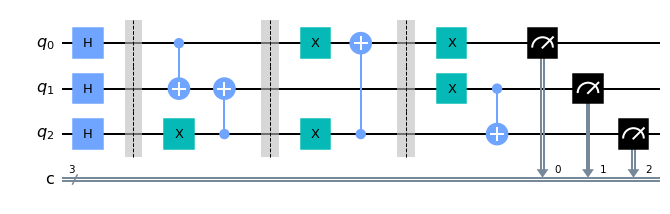

In [ ]:
#q = QuantumRegister(2, 'q')
#c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(3,3)

circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.barrier()

circuit.cx(0,1)
circuit.x(2)
circuit.cx(2,1)
circuit.barrier()

circuit.x(0)
circuit.x(2)
circuit.cx(2,0)
circuit.barrier()

circuit.x(1)
circuit.x(0)
circuit.cx(1,2)

circuit.measure(0,0)
circuit.measure(1,1)
circuit.measure(2,2)
circuit.draw('mpl')


results: {'101': 130, '001': 128, '111': 125, '011': 143, '000': 118, '010': 133, '110': 137, '100': 110}


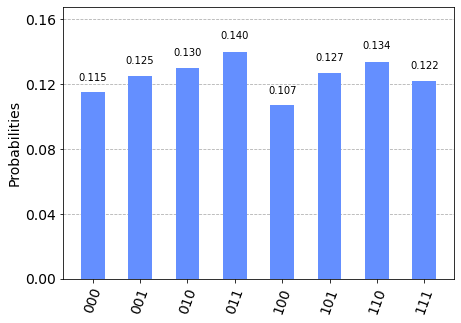

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend = simulator, shots=1024)
result = job.result()

counts = result.get_counts(circuit)
print("results:", counts)

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

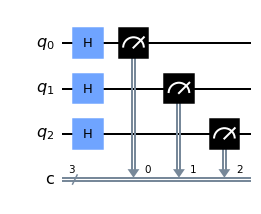

In [ ]:
mycircuit = QuantumCircuit(3, 3)

mycircuit.h(0)
mycircuit.h(1)
mycircuit.h(2)

#here, your code

mycircuit.measure(0,0)
mycircuit.measure(1,1)
mycircuit.measure(2,2)

mycircuit.draw('mpl')